In [1]:
pip install Augmentor

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import numpy as np
import cv2
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPool2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import pandas as pd
import os
from PIL import Image


# Dataset Loading

In [13]:
dataset = []
inputPath=os.path.join("C:/Users/Admin/JupyterProjectas/Files_modified/drawings/spiral/testing/parkinson/")
newDir=os.path.join("C:/Users/Admin/JupyterProjectas/Files_modified/drawings/saved_aug/testing/")

for imagePaths in os.listdir(inputPath):
        # imagePath contains name of the image 
        inputPathh = os.path.join(inputPath, imagePaths)

# Image 

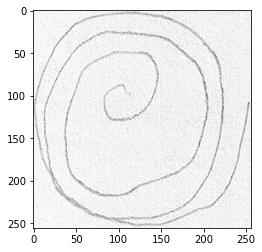

In [14]:
image=Image.open(inputPathh)
plt.imshow(image)
plt.show()

# Augmentation Started

In [15]:

import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os

datagen = ImageDataGenerator(rotation_range =360, 
                     width_shift_range = 0.1, 
                     height_shift_range = 0.1,  
                     shear_range=0.2, 
                     zoom_range=0.2, 
                     horizontal_flip = True,
                     vertical_flip = True,
                     brightness_range=[0.5, 1.5])     

# datagen = ImageDataGenerator(
#         rotation_range=30, 
#         width_shift_range=0.3,
#         height_shift_range=0.3, 
#         shear_range=0.2, 
#         zoom_range=0.2,
#         horizontal_flip=True, 
#         vertical_flip=True,
#         fill_mode='nearest')

In [16]:
# Use the ImageDataGenerator class to preprocess the testing data
test_datagen = ImageDataGenerator(rescale=1./255)

# List  of files present in directory

In [17]:
filenames = next(os.walk("C:/Users/Admin/JupyterProjectas/Files_modified/drawings/spiral/testing/parkinson"))[2]
filenames

['V01PE01.png',
 'V02PE01.png',
 'V03PE01.png',
 'V03PE04.png',
 'V03PE07.png',
 'V04PE01.png',
 'V05PE01.png',
 'V06PE01.png',
 'V07PE01.png',
 'V08PE01.png',
 'V09PE01.png',
 'V10PE03.png',
 'V11PE03.png',
 'V14PE03.png',
 'V15PE01.png']

# Saving in folder

In [18]:
for img in filenames:
    img = load_img("C:/Users/Admin/JupyterProjectas/Files_modified/drawings/spiral/testing/parkinson/"+img, color_mode='grayscale')
    x = img_to_array(img)  # this is a Numpy array with shape (150, 150, 1)
    x = x.reshape((1,) + x.shape)
    
    i = 0
    for batch in datagen.flow (x, batch_size=1, save_to_dir =newDir+'parkinson', save_prefix ='aug', save_format='png'):
        i+=1
        if i>3:
             break

# #For one image how augmentation worked

# #Rotation of image

In [45]:
from numpy import expand_dims


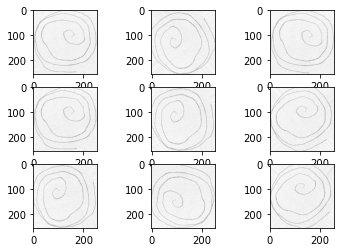

In [46]:
data = img_to_array(image)
samples = expand_dims(data, 0)
data_generated = ImageDataGenerator(rotation_range=90)
it = data_generated.flow(samples, batch_size=10)

for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint8')
    plt.imshow(result)
plt.show()
    
#         plt.subplot(330+1+i)
#         plt.imshow(.reshape(28,28),cmap=plt.get_cmap('gray'))
#     plt.show()
#     break

# Vertical Shift

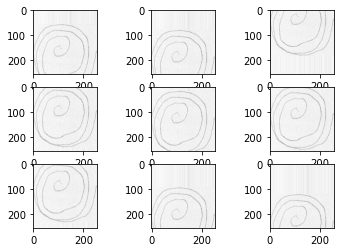

In [47]:
data = img_to_array(image)
samples = expand_dims(data, 0)
data_generator = ImageDataGenerator(height_shift_range=0.5)
it = data_generator.flow(samples, batch_size=1)
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint8')
    plt.imshow(result)
plt.show()

# Horizontal Shift

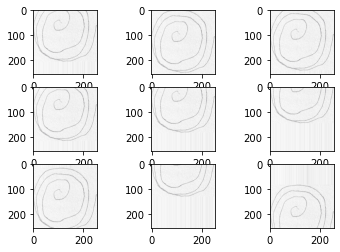

In [48]:
data = img_to_array(image)
samples = expand_dims(data, 0)
# data_generator = ImageDataGenerator(width_shift_range=[-100,100])
it = data_generator.flow(samples, batch_size=1)
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint8')
    plt.imshow(result)
plt.show()

# Color Space

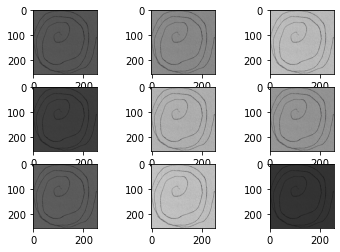

In [49]:
data = img_to_array(image)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint8')
    plt.imshow(result)
plt.show()

# Zooming

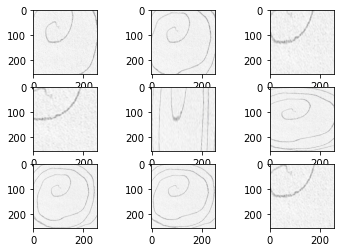

In [50]:
data = img_to_array(image)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(zoom_range=[0.2,1.0])
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint8')
    plt.imshow(result)
plt.show()

# Flipping

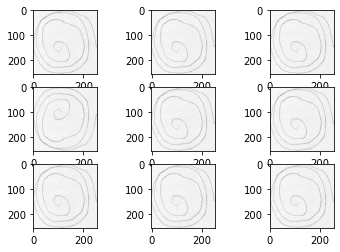

In [51]:
data = img_to_array(image)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint8')
    datagen.flow(samples, batch_size=1)
    plt.imshow(result)
plt.show()

# CNN started

In [52]:
from keras.preprocessing.image import ImageDataGenerator

In [53]:
train_datagen = ImageDataGenerator(rotation_range =360, 
                                   rescale = 1./255,
                     
                     shear_range=0.23, 
                      
               
                    
                     brightness_range=[0.5, 1.5])

test_datagen = ImageDataGenerator(rescale = 1./255)

In [55]:
spiral_train_generator = train_datagen.flow_from_directory("C:/Users/Admin/JupyterProjectas/Files_modified/drawings/saved_aug/training/",
                                                   target_size = (128,128),
                                                   color_mode="grayscale",
                                                   batch_size = 32,
                                                   class_mode = 'categorical')

spiral_test_generator = test_datagen.flow_from_directory("C:/Users/Admin/JupyterProjectas/Files_modified/drawings/saved_aug/testing/",
                                                   target_size = (128,128),
                                                   color_mode="grayscale",
                                                   batch_size = 32,
                                                   class_mode = 'categorical')

Found 284 images belonging to 2 classes.
Found 237 images belonging to 2 classes.


In [65]:
def parkinson_disease_detection_model(input_shape=(128, 128, 1)):
    regularizer = tf.keras.regularizers.l2(0.001)
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(128, (5, 5), padding='same', strides=(1, 1), name='conv1', activation='relu', 
                     kernel_initializer='glorot_uniform', kernel_regularizer=regularizer))
    model.add(MaxPool2D((9, 9), strides=(3, 3)))

    model.add(Conv2D(64, (5, 5), padding='same', strides=(1, 1), name='conv2', activation='relu', 
                     kernel_initializer='glorot_uniform', kernel_regularizer=regularizer))
    model.add(MaxPool2D((7, 7), strides=(3, 3)))
    
    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv3', activation='relu', 
                     kernel_initializer='glorot_uniform', kernel_regularizer=regularizer))
    model.add(MaxPool2D((5, 5), strides=(2, 2)))

    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv4', activation='relu', 
                     kernel_initializer='glorot_uniform', kernel_regularizer=regularizer))
    model.add(MaxPool2D((3, 3), strides=(2, 2)))    
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform', name='fc1'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax', kernel_initializer='glorot_uniform', name='fc3'))
    
    optimizer = Adam(3.15e-5)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [66]:
model= parkinson_disease_detection_model(input_shape=(128, 128, 1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 128, 128, 128)     3328      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 40, 40, 128)      0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (None, 40, 40, 64)        204864    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 conv3 (Conv2D)              (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 4, 4, 32)        

In [67]:
hist = model.fit(spiral_train_generator, batch_size=12, epochs=10, validation_data=spiral_test_generator)


# history =model.fit(spiral_train_generator, batch_size=12, epochs=10, validation_data=spiral_test_generator)


Epoch 1/10
9/9 [==============================] - 23s 3s/step - loss: 0.8539 - accuracy: 0.5176 - val_loss: 0.8412 - val_accuracy: 0.7511
Epoch 2/10
9/9 [==============================] - 22s 2s/step - loss: 0.8569 - accuracy: 0.4754 - val_loss: 0.8435 - val_accuracy: 0.7511
Epoch 3/10
9/9 [==============================] - 21s 2s/step - loss: 0.8568 - accuracy: 0.4754 - val_loss: 0.8445 - val_accuracy: 0.7511
Epoch 4/10
9/9 [==============================] - 21s 2s/step - loss: 0.8523 - accuracy: 0.5106 - val_loss: 0.8445 - val_accuracy: 0.7511
Epoch 5/10
9/9 [==============================] - 21s 2s/step - loss: 0.8524 - accuracy: 0.5246 - val_loss: 0.8426 - val_accuracy: 0.7511
Epoch 6/10
9/9 [==============================] - 36s 4s/step - loss: 0.8469 - accuracy: 0.4894 - val_loss: 0.8423 - val_accuracy: 0.7511
Epoch 7/10
9/9 [==============================] - 35s 4s/step - loss: 0.8486 - accuracy: 0.5141 - val_loss: 0.8424 - val_accuracy: 0.7511
Epoch 8/10
9/9 [==================

KeyboardInterrupt: 

In [68]:

ypred = model.predict(spiral_train_generator)


In [69]:

ypred = np.argmax(ypred, axis=1)


In [70]:
y_test_pred = model.predict(spiral_train_generator)

In [71]:
y_test_pred = np.argmax(y_test_pred, axis=1)


In [72]:
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
acc = accuracy_score(y_test_pred, ypred)
prec = precision_score(y_test_pred, ypred)
rec = recall_score(y_test_pred, ypred)
f1 = f1_score(y_test_pred, ypred)
cm = confusion_matrix(y_test_pred, ypred)

In [74]:
print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1 Score: ", f1)
print("Confusion Matrix: \n", cm)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
Confusion Matrix: 
 [[284]]


In [75]:
print(classification_report(y_test_pred, ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       284

    accuracy                           1.00       284
   macro avg       1.00      1.00      1.00       284
weighted avg       1.00      1.00      1.00       284



In [76]:
matrix = confusion_matrix(y_test_pred, ypred)
df_cm = pd.DataFrame(matrix, index=[0, 1], columns=[0, 1])
figure = plt.figure(figsize=(5, 5))
sns.heatmap(df_cm, annot=True, fmt='d')

ValueError: Shape of passed values is (1, 1), indices imply (2, 2)

In [77]:
model.save('parkinson_disease_detection.h5')

In [37]:
# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model

In [92]:
model = load_model('parkinson_disease_detection.h5')

In [93]:
score = model.evaluate(spiral_train_generator, verbose=1)

3/3 [==============================] - 2s 410ms/step - loss: 0.8908 - accuracy: 0.4444


In [94]:
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 44.44%


In [95]:
score = model.evaluate(spiral_test_generator, verbose=1)

1/1 [==============================] - 1s 749ms/step - loss: 0.8417 - accuracy: 0.5000


In [78]:
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 50.00%
